# Imports and functions

In [5]:
import numpy as np
from joblib import Parallel, delayed
import matplotlib.pyplot as plt

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from lib.renormalization_np import track_rg_flow


def analyze_coefficient_spectrum(jm_pairs, n_max=20, n_steps=20, b=2, d=2):
    """
    Calculate final coefficients for multiple (J, M) initial value pairs
    
    Args:
        jm_pairs: List of (J, M) pairs to analyze
        n_max: Maximum Fourier mode
        n_steps: Number of RG steps
        b: Length rescaling factor
        d: Dimension
        
    Returns:
        Dictionary with coefficient data
    """
    # Define the coefficients we want to track
    coeff_indices = [
        #(0, 1),  # (0,1)
        (1, 0),  # (1,0)
        (1, 1),  # (1,1)
        (2, 0),  # (2,0)
        #(0, 2),  # (0,2)
        (2, 2),  # (2,2),
        (3 ,0),
        (3, 3)
    ]
    
    # Initialize results list
    results = []
    
    # Process each (J, M) pair
    for j, m in jm_pairs:
        print(f"Processing J={j}, M={m}")
        
        # Track the RG flow
        flow_history = track_rg_flow(j, j, m, b, d, n_max, n_steps)
        
        # Extract final coefficients
        final_coeffs = flow_history[-1]
        
        # Get the coefficients of interest
        coeff_values = {}
        for n, m_idx in coeff_indices:
            n_idx = n + n_max
            m_idx = m_idx + n_max
            coeff_values[(n, m_idx - n_max)] = final_coeffs[n_idx, m_idx].real
        
        # Store results
        results.append({
            'J': j,
            'M': m,
            'coefficients': coeff_values
        })
    
    return {
        'results': results,
        'coeff_indices': coeff_indices
    }

def plot_coefficient_spectrum(spectrum_data, figsize=(12, 8)):
    """
    Plot coefficient spectrum for multiple (J, M) pairs with larger markers only (no lines),
    using colorblind-friendly colors and different marker shapes.
    
    Args:
        spectrum_data: Output from analyze_coefficient_spectrum
        figsize: Figure size tuple
        
    Returns:
        Matplotlib figure
    """
    results = spectrum_data['results']
    coeff_indices = spectrum_data['coeff_indices']
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Define x positions for the coefficients
    x_pos = np.arange(len(coeff_indices))
    
    # Define a colorblind-friendly color palette
    # Using IBM ColorBlind palette: blue, orange, green, red, purple, brown, pink, gray
    colors = [
        "#648FFF", "#785EF0", "#DC267F", "#FE6100", "#FFB000", 
        "#009E73", "#CC79A7", "#56B4E9"
    ]
    
    # Define different marker styles
    markers = ['o', 's', '^', 'D', 'v', 'p', 'P', '*', 'X', 'h']
    
    # Plot coefficients for each (J,M) pair
    for i, result in enumerate(results):
        j = result['J']
        m = result['M']
        coeffs = result['coefficients']
        
        # Get coefficient values in the right order
        y_values = [coeffs[idx] for idx in coeff_indices]
        
        # Select color and marker (cycling if more pairs than colors/markers)
        color = colors[i % len(colors)]
        marker = markers[i % len(markers)]
        
        # Plot with larger markers only (no lines)
        ax.plot(x_pos, y_values, linestyle='none', marker=marker, 
                color=color, markersize=12, label=f'J={j}, M={m}')
    
    # Create nice x-tick labels
    x_tick_labels = [f'$\\lambda_{{{n},{m}}}$' for n, m in coeff_indices]
    
    # Set axis properties
    ax.set_xticks(x_pos)
    ax.set_xticklabels(x_tick_labels, fontsize=14)
    ax.set_ylabel('Coefficient Value', fontsize=14)
    #ax.set_title('Final Coefficient Spectrum After RG Flow', fontsize=16)
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Improve tick label sizes
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    # Add legend with larger font
    ax.legend(title='Initial (J, M)', loc='best', fontsize=12, title_fontsize=14)
    
    plt.tight_layout()
    return fig

# Calculations and plot

Processing J=0.8, M=0


100%|██████████| 10/10 [00:27<00:00,  2.76s/it]


Processing J=1.0, M=0


100%|██████████| 10/10 [00:27<00:00,  2.72s/it]


Processing J=1.5, M=0


100%|██████████| 10/10 [00:27<00:00,  2.72s/it]


Processing J=2.0, M=0


100%|██████████| 10/10 [00:27<00:00,  2.74s/it]


Processing J=2.5, M=0


100%|██████████| 10/10 [00:27<00:00,  2.71s/it]


Processing J=3.0, M=0


100%|██████████| 10/10 [00:28<00:00,  2.88s/it]


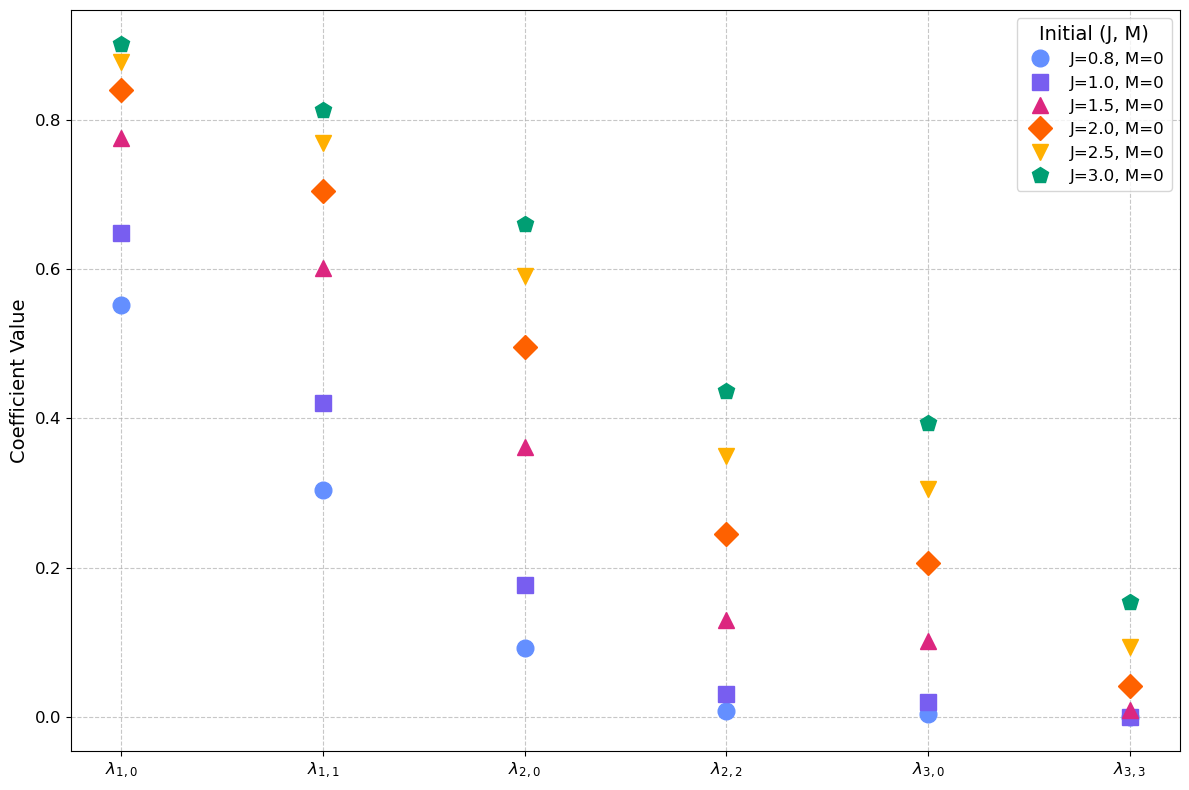

In [11]:
# Define several (J, M) pairs to analyze
# (0.5, 0.0),   # Pure J, weak coupling
# (1.0, 0.0),   # Pure J, moderate coupling
# (1.5, 0.0),   # Pure J, strong coupling
# (1.0, 0.5),   # Mixed J and M (positive)
# (1.0, 1.0),   # Equal J and M
# (1.0, -0.5),  # Competing J and M (negative)
# (0.6, 0.2),   # Near critical point

jm_pairs = [
    (0.8, 0),
    (1.0, 0),
    (1.5, 0),
    (2.0, 0),
    (2.5, 0),
    (3.0, 0),]


# Analyze coefficient spectrum
spectrum_data = analyze_coefficient_spectrum(jm_pairs, n_max=20, n_steps=10, b=3, d=2)

# Plot coefficient spectrum with improved visualization
spectrum_fig = plot_coefficient_spectrum(spectrum_data)
#plt.savefig("fixed-line_comparison.png", dpi=200)
plt.show()